In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/train.csv')

In [3]:
df1=df.copy()

In [4]:
df1.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

#### Simply imputing categorical by mode & numerical by mean

In [5]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')
sicate=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    if df1[i].isnull().sum()>0:
        df1[i]=sicate.fit_transform(np.array(df1[i]).reshape(-1,1))
for i in df1.select_dtypes(exclude='object'):
    if df1[i].isnull().sum()>0:
        df1[i]=si.fit_transform(np.array(df1[i]).reshape(-1,1))

In [6]:
df1.drop('Trip_ID',1,inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  object 
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  int64  
dtyp

Type_of_Cab-object
Confidence_Life_Style_Index-object
Destination_Type-object
Gender-object

#### Automatic Label encoding[All categorical label encoded]:

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df1.select_dtypes(include='object'):
    df1[i]=le.fit_transform(df1[i])

In [9]:
X=df1.drop('Surge_Pricing_Type',1)
y=df1['Surge_Pricing_Type']

In [10]:
X=df1.drop('Surge_Pricing_Type',1)
y=df1['Surge_Pricing_Type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dt = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,30), 'criterion':['entropy','gini']}
rscv = RandomizedSearchCV(dt, dt_params, cv=5)
rscv.fit(X, y)
print(rscv.best_params_)
rscv_best_DT=rscv.best_params_
DT=DecisionTreeClassifier(**rscv_best_DT)
DT.fit(X_train,y_train)

# After removing scoring='roc_auc',I got the results of gscv/rscv
# {'min_samples_leaf': 16, 'max_depth': 9, 'criterion': 'gini'}

# DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                        max_depth=9, max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=16, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, presort='deprecated',
#                        random_state=None, splitter='best')

{'min_samples_leaf': 12, 'max_depth': 8, 'criterion': 'gini'}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_pred=DT.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.678084532715604

#### Test data manipulations:

In [13]:
dfte=pd.read_csv('D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/test.csv')

df2=dfte.copy()

from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')
sicate=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in df2.select_dtypes(include='object'):
    if df2[i].isnull().sum()>0:
        df2[i]=sicate.fit_transform(np.array(df2[i]).reshape(-1,1))
for i in df2.select_dtypes(exclude='object'):
    if df2[i].isnull().sum()>0:
        df2[i]=si.fit_transform(np.array(df2[i]).reshape(-1,1))
df2.drop('Trip_ID',1,inplace=True)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df2.select_dtypes(include='object'):
    df2[i]=le.fit_transform(df2[i])

##### Using Logistic Regression:[For all label encoded]

In [14]:
lr=LogisticRegression()
lr.fit(X,y)
y_test_pred_lr=lr.predict(df2)
finalpred=pd.concat([dfte['Trip_ID'],pd.DataFrame(y_test_pred_lr,columns=['Surge_Pricing_Type'])],1)
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/lrpred.csv",index=False)
# This is the worst performing model with accuracy .63,we will move to other models.

##### Using Decision Tree:[For all label encoded]

In [185]:
X=df1.drop('Surge_Pricing_Type',1)
y=df1['Surge_Pricing_Type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [16]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dt = DecisionTreeClassifier()
# dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,30), 'criterion':['entropy','gini']}
# rscv = RandomizedSearchCV(dt, dt_params, cv=5)
# rscv.fit(X, y)
# print(rscv.best_params_)
# rscv_best_DT=rscv.best_params_
DT=DecisionTreeClassifier(**{'min_samples_leaf': 16, 'max_depth': 8, 'criterion': 'gini'})# These hyperparameters were obtained after randomizedsearch CV
DT.fit(X,y)
y_test_pred_DT=DT.predict(df2)
finalpred=pd.concat([dfte['Trip_ID'],pd.DataFrame(y_test_pred_DT,columns=['Surge_Pricing_Type'])],1)
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/DTpred.csv",index=False)
# After removing scoring='roc_auc',I got the results of gscv/rscv
# {'min_samples_leaf': 16, 'max_depth': 8, 'criterion': 'gini'}
# On AV platform got .6811 score

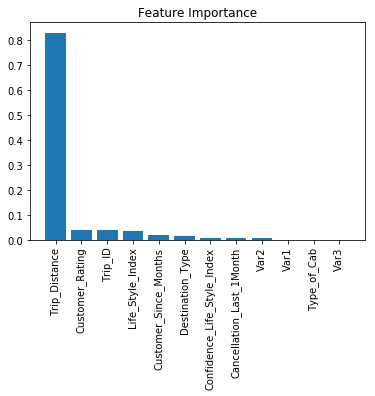

In [221]:
importances = DT.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [df.columns[i] for i in indices]  # only need to change this df
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

# the plot below shows that only  trip distance,customer rating,life+style+index are imp

### Small testing using feature importance for DT:

In [234]:
X=df1[['Trip_Distance','Customer_Rating','Life_Style_Index','Customer_Since_Months','Destination_Type']]
y=df1['Surge_Pricing_Type']

In [229]:
dftemp=df2.copy()
dftemp=dftemp[X.columns]

In [237]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dt = DecisionTreeClassifier()
# dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,30), 'criterion':['entropy','gini']}
# rscv = RandomizedSearchCV(dt, dt_params, cv=5)
# rscv.fit(X, y)
# print(rscv.best_params_)
# rscv_best_DT=rscv.best_params_
DT=DecisionTreeClassifier()# These hyperparameters were obtained after randomizedsearch CV
DT.fit(X,y)
y_test_pred_DT=DT.predict(dftemp)
finalpred=pd.concat([dfte['Trip_ID'],pd.DataFrame(y_test_pred_DT,columns=['Surge_Pricing_Type'])],1)
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/DTpred.csv",index=False)

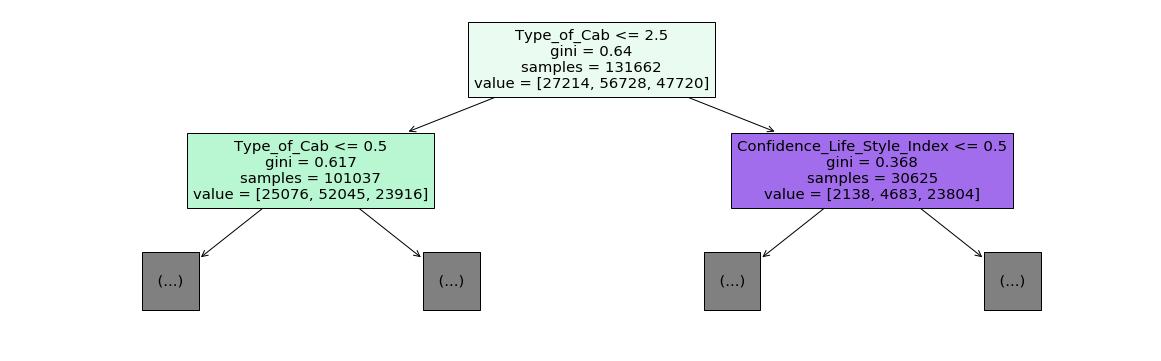

In [56]:
from sklearn.tree import plot_tree,export_text

fig,axes=plt.subplots(figsize=(20,6))
plot_tree(DT,feature_names=X.columns,max_depth=1,filled=True,ax=axes)
plt.show()

##### Using XGB:[For all label encoded]

In [61]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
#               learning_rate=0.09, max_delta_step=0, max_depth=4,
#               min_child_weight=4, missing=None, n_estimators=125, n_jobs=1,
#               nthread=None, objective='multi:softprob', random_state=0,
#               reg_alpha=1e-06, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1)
# On AV platform got .6892 score,using XGB performance slightly improved

params = {"objective": "multi:softmax","booster": "gbtree", "nthread": 4, "silent": 1,
                "eta": 0.08, "max_depth": 6, "subsample": 0.9, "colsample_bytree": 0.7,
                "min_child_weight": 1, "num_class": 3,
                "seed": 2016, "tree_method": "exact"}
# approx 0.6935 on AV using above params.

In [62]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,colsample_bytree=0.5,reg_alpha=0.000001 )
xgb=XGBClassifier(**params)
xgb.fit(X,y)

y_test_pred_xgb=xgb.predict(df2)
finalpred=pd.concat([dfte['Trip_ID'],pd.DataFrame(y_test_pred_xgb,columns=['Surge_Pricing_Type'])],1)
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/xgbpred.csv",index=False)

##### Using Random Forest:[For all label encoded]

In [186]:
# rf_params = {
#     'bootstrap': [True],
#     'max_depth': [3,10],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10],
#     'n_estimators': [100, 200]}
# rf=RandomForestClassifier()
# rscv_rf = RandomizedSearchCV(rf, rf_params, cv=3)
# rscv_rf.fit(X, y)
# print(rscv_rf.best_params_)
# rscv_rf_best_rf=rscv_rf.best_params_



# {'n_estimators': 200}
# print(rscv_rf_best_rf)
# {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 10, 'bootstrap': True}

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 10, 'bootstrap': True}
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 10, 'bootstrap': True}


In [188]:
# {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 10, 'bootstrap': True}
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 10, 'bootstrap': True})
rf.fit(X,y)
y_test_pred_rf=rf.predict(df2)
finalpred=pd.concat([dfte['Trip_ID'],pd.DataFrame(y_test_pred_rf,columns=['Surge_Pricing_Type'])],1)
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/rfpred.csv",index=False)
#.6860 av score

In [68]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df1.drop('Surge_Pricing_Type',1)
y=df1['Surge_Pricing_Type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            sctr.append(train_score)
            scte.append(test_score)
    return sctr,scte
ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'training':sctr,'testing':scte})
ensemble=ensemble.sort_values(by='acc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing
0,Random Forest,0.682831,0.999991,0.682831
1,Ada boost,0.681312,0.682775,0.681312
2,Bagging,0.645730,0.982616,0.645730
3,Naive-Bayes,0.643755,0.646536,0.643755
4,Logistic Regression,0.641628,0.642615,0.641628
5,bagged LR,0.639198,0.640185,0.639198
6,Decistion Tree,0.557134,1.000000,0.557134
7,KNN,0.489272,0.664584,0.489272


#### All get_dummies:

In [167]:
df3=df.copy()

In [168]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')
sicate=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in df3.select_dtypes(include='object'):
    if df3[i].isnull().sum()>0:
        df3[i]=sicate.fit_transform(np.array(df3[i]).reshape(-1,1))
for i in df3.select_dtypes(exclude='object'):
    if df3[i].isnull().sum()>0:
        df3[i]=si.fit_transform(np.array(df3[i]).reshape(-1,1))
df3.drop('Trip_ID',1,inplace=True)

In [169]:
for i in df3.select_dtypes(include='object'):
    df3=pd.concat([df3,pd.get_dummies(df3[i],prefix=i,drop_first=True)],1)
    del df3[i]

##### Manipulating test data:

In [173]:
df4=dfte.copy()

In [174]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')
sicate=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in df4.select_dtypes(include='object'):
    if df4[i].isnull().sum()>0:
        df4[i]=sicate.fit_transform(np.array(df4[i]).reshape(-1,1))
for i in df4.select_dtypes(exclude='object'):
    if df4[i].isnull().sum()>0:
        df4[i]=si.fit_transform(np.array(df4[i]).reshape(-1,1))
df4.drop('Trip_ID',1,inplace=True)
for i in df4.select_dtypes(include='object'):
    df4=pd.concat([df4,pd.get_dummies(df4[i],prefix=i,drop_first=True)],1)
    del df4[i]

In [177]:
X=df3.drop('Surge_Pricing_Type',1)
y=df3['Surge_Pricing_Type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [180]:
params = {"objective": "multi:softmax","booster": "gbtree", "nthread": 4, "silent": 1,
                "eta": 0.08, "max_depth": 6, "subsample": 0.9, "colsample_bytree": 0.7,
                "min_child_weight": 1, "num_class": 3,
                "seed": 2016, "tree_method": "exact"}
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(df4)
finalpred=pd.concat([dfte['Trip_ID'],pd.DataFrame(y_test_pred_xgb,columns=['Surge_Pricing_Type'])],1)
finalpred.to_csv("D:/datasets+minipro/analytics vidhya datasets/janatahack p4 ola uber/xgbpredgetdumm.csv",index=False)

### 0.6929 accuracy score.

In [184]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df3.drop('Surge_Pricing_Type',1)
y=df3['Surge_Pricing_Type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            sctr.append(train_score)
            scte.append(test_score)
    return sctr,scte
ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'training':sctr,'testing':scte})
ensemble=ensemble.sort_values(by='testing',ascending=False).reset_index(drop=True)
ensemble

,names,training,testing
0,Random Forest,1.000000,0.684616
1,Ada boost,0.679813,0.680895
2,Bagging,0.982854,0.650856
3,bagged LR,0.648179,0.647590
4,Logistic Regression,0.648672,0.647135
5,Naive-Bayes,0.618681,0.614552
6,Decistion Tree,1.000000,0.561691
7,KNN,0.631763,0.438841


In [238]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
